In [64]:
import pandas as pd
import numpy as np
import re
import nltk
from sklearn.datasets import load_files
#nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords
import matplotlib.pyplot as plt


In [65]:
data = pd.read_csv('output_lower.csv')
data.head(10)

,rating,review
0,__label__5,jeg elsker zaladnozalando har så mange forskel...
1,__label__4,handlet flere gange. gode produkter nemt at b...
2,__label__5,alt til ug. billige priser. nem returnering. s...
3,__label__2,hej betalt min regning ( troede jeg) den var å...
4,__label__5,super godt.hurtig levering og fine priser.
5,__label__2,jeg har bestilt et par sandaler ved zalando og...
6,__label__1,irriterende at få en rykker på 100 kr for mang...
7,__label__3,har køb hos zalando i mange år og har været st...
8,__label__1,synes godt nok det er for dårligt at man betal...
9,__label__1,nu har jeg oplevet flere gange hvor jeg bestil...


In [67]:
import fasttext

model = fasttext.train_supervised('output_lower.csv')
data['vec'] = data['review'].apply(lambda x: model.get_sentence_vector(x))

In [68]:
# modellen kan her finde de ord der er tættes på parametret 
model.get_nearest_neighbors('dårlig')

[(0.9996523261070251, 'syning/limning'),
 (0.9996523261070251, 'prøvning'),
 (0.9996523261070251, '(bodystocking)'),
 (0.9996523261070251, 'held)'),
 (0.9996523261070251, 'held).'),
 (0.9996514916419983, 'datter.denne'),
 (0.9996514916419983, 'overvågning'),
 (0.9996514916419983, 'efterspurgt'),
 (0.9996514916419983, 'nudet'),
 (0.9996482133865356, 'af..')]

In [69]:
model.get_nearest_neighbors('utilfreds')

[(0.8899314999580383, ',skuffet'),
 (0.8864197134971619, 'dages'),
 (0.8847198486328125, 'fejl'),
 (0.8831532597541809, 'løgnagtig'),
 (0.8831429481506348, ',samarbejder'),
 (0.8831429481506348, 'rækkevidde'),
 (0.8831429481506348, 'shaming'),
 (0.8831198811531067, 'slim'),
 (0.8831198811531067, 'slimfit...det'),
 (0.8831198811531067, 'fit')]

In [70]:
model.get_nearest_neighbors('glad')

[(0.9842039942741394, 'frontbilled'),
 (0.9842039942741394, 'efterspurgte'),
 (0.9842039942741394, 'finde!?'),
 (0.9842039942741394, 'hedder?'),
 (0.9842039942741394, 'ikke?'),
 (0.9841753244400024, 'gør.den'),
 (0.9841753244400024, '(hurtigt'),
 (0.9841753244400024, 'varen.varen'),
 (0.9841753244400024, 'bevares)'),
 (0.9841753244400024, 'lille.jeg')]

In [71]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
data['cluster'] = kmeans.fit_predict(data['vec'].values.tolist())

In [72]:
print(data['cluster'])

0       3
1       1
2       3
3       0
4       1
       ..
5059    1
5060    1
5061    3
5062    2
5063    1
Name: cluster, Length: 5064, dtype: int32


In [73]:
print(model.labels)

['__label__5', '__label__1', '__label__4', '__label__2', '__label__3']


In [74]:
clusterCount = np.bincount(data['cluster'])
print(clusterCount)
-np.sort(-clusterCount)

[2037  606  991 1120  310]


array([2037, 1120,  991,  606,  310])

In [75]:
data['rating'].value_counts(ascending=False)

__label__5     2694
__label__1     1664
__label__4      289
__label__2      261
__label__3      156
Name: rating, dtype: int64

In [76]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
data['x'] = pca.fit_transform(data['vec'].values.tolist())[:,0]
data['y'] = pca.fit_transform(data['vec'].values.tolist())[:,1]
data['z'] = pca.fit_transform(data['vec'].values.tolist())[:,2]

In [77]:
#print(*pca.fit_transform(data['vec'].values.tolist())[:,0])

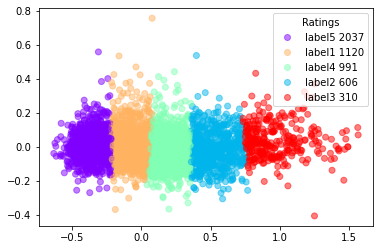

In [80]:
scatter = plt.scatter(data['x'], data['y'], c=data['cluster'], cmap='rainbow', alpha=0.5)

# dc = data_cluster
# cc = cluster_colors
# cl = cluster_labels

dc = data['cluster'].value_counts()
dc = -np.sort(-dc)
cc = data['cluster'].value_counts().index.tolist()

cl = []
for i in model.labels:
    cl.append(i.replace('__',''))

handles = scatter.legend_elements(num=cc)[0]  # extract the handles from the existing scatter plot

plt.legend(title='Ratings', handles=handles,  
           labels=[cl[0]+' '+str(dc[0]),
                   cl[1]+' '+str(dc[1]),
                   cl[2]+' '+str(dc[2]),
                   cl[3]+' '+str(dc[3]),
                   cl[4]+' '+str(dc[4])])

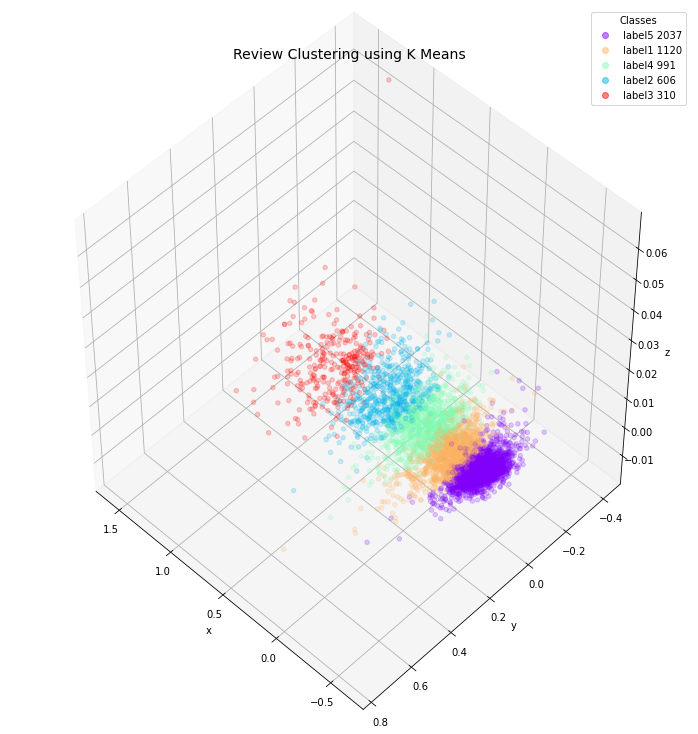

In [79]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(10,10))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(data['x'],data['y'],data['z'], c=data['cluster'], cmap='rainbow', alpha=0.2)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_facecolor('white')
plt.title("Review Clustering using K Means", fontsize=14)
plt.legend(title='Classes', handles=handles, 
           labels=[cl[0]+' '+str(dc[0]),
                   cl[1]+' '+str(dc[1]),
                   cl[2]+' '+str(dc[2]),
                   cl[3]+' '+str(dc[3]),
                   cl[4]+' '+str(dc[4])])
